In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st



In [6]:
# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
drug_results_path = "Resources/Study_results.csv"

 

In [7]:

mouse_metadata = pd.read_csv(mouse_metadata_path)
drug_results = pd.read_csv(drug_results_path)



In [8]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, drug_results, on="Mouse ID", how="left")


mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mouse_study_df['Mouse ID'].value_counts()
unique_mouse = mouse_study_df['Mouse ID'].unique()

unique_mouse_len = len(unique_mouse)
print("The number of mice are " + str(unique_mouse_len))

The number of mice are 249


In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

clean_mouse_metadata= mouse_metadata[mouse_metadata['Mouse ID'].isin(duplicate_mouse_id)==False]
clean_drug_results = drug_results[drug_results['Mouse ID'].isin(duplicate_mouse_id)==False]




In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Checking the number of mice in the clean DataFrame.

merge_data = pd.merge(clean_mouse_metadata, clean_drug_results ,on = "Mouse ID")

sort_timepoint = merge_data.sort_values("Timepoint", ascending= True) 


total_sort_timepoint = sort_timepoint.reset_index()
del total_sort_timepoint['index']
total_sort_timepoint.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,n678,Propriva,Male,5,29,0,45.0,0
2,n763,Placebo,Female,16,25,0,45.0,0
3,v923,Capomulin,Female,19,21,0,45.0,0
4,w150,Capomulin,Male,23,23,0,45.0,0


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_mouse_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_mouse_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

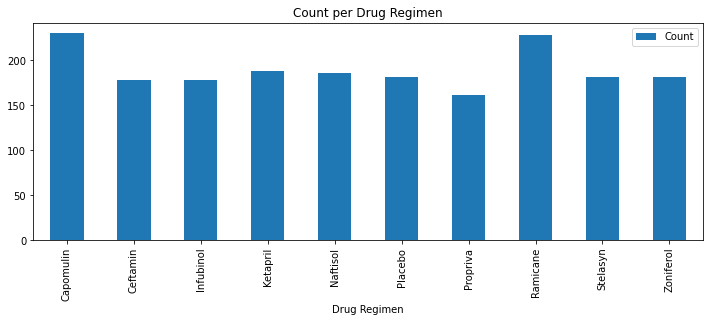

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

total_df = pd.DataFrame(mouse_study_df.groupby(["Drug Regimen"]).count()).reset_index()
regimen_data = total_df[["Drug Regimen","Mouse ID"]]
regimen_data = regimen_data.rename(columns={"Mouse ID": "Count"})

regimen_data = regimen_data.set_index("Drug Regimen")
regimen_data.plot(kind="bar", figsize=(12,4))

# Set a title for the chart
plt.title("Count per Drug Regimen")

plt.show()
plt.tight_layout()

Text(0.5, 0, 'Drug Regimen')

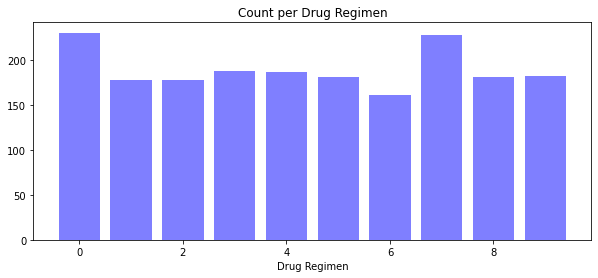

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
import numpy as np
drug_regimens = summary_mouse_df.index.tolist()
#drug_regimens
regimen_count = (mouse_study_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
#regimen_count
x_axis = np.arange(len(regimen_count))
#x_axis = drug_regimens
# Create a bar chart based upon the above data
plt.figure(figsize=(10,4))
plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align="center")
plt.title("Count per Drug Regimen")
plt.xlabel("Drug Regimen")




Text(0.5, 0, 'Drug Regimen')

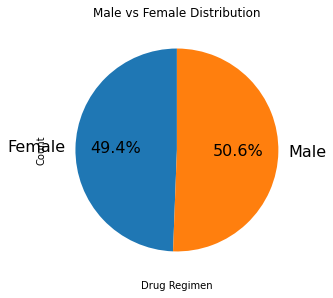

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = pd.DataFrame(mouse_study_df.groupby(["Sex"]).count()).reset_index()
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
#gender_df.head()
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=16)
plt.title("Male vs Female Distribution")
plt.xlabel("Drug Regimen")





([<matplotlib.patches.Wedge at 0x158b892e520>,
 [Text(-0.7887477729166414, -0.904365496201087, 'Females'),
  Text(0.7230187918402547, 0.8290017048509963, 'Males')],
 [Text(-0.46010286753470747, -0.527546539450634, '49.4%'),
  Text(0.3943738864583208, 0.4521827481005434, '50.6%')])

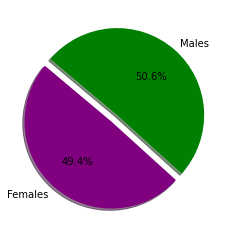

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (mouse_study_df.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count
labels = ["Females", "Males"]

# The colors of each section of the pie chart
colors = ["purple", "green"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0)
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_study_df.head()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
sorted_df = mouse_study_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
# Select final volume of each mouse 
max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_df.head().reset_index()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [14]:
# Start by getting the last (greatest) timepoint for each mouse
infubinol_data_df = max_df[max_df['Drug Regimen'].isin(['Infubinol'])]
infubinol_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,540,a685,Infubinol,Male,8,30,45,66.083066,3
3,637,c139,Infubinol,Male,11,28,45,72.226731,2
4,800,e476,Infubinol,Male,23,26,45,62.435404,1


In [28]:
ceftamin_data_df = max_df[max_df['Drug Regimen'].isin(['Ceftamin'])]
ceftamin_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,493,a275,Ceftamin,Female,20,28,45,62.999356,3
1,993,j296,Ceftamin,Female,24,30,45,61.849023,3
2,1033,k210,Ceftamin,Male,15,28,45,68.923185,3
3,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
4,1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [29]:
capomulin_data_df = max_df[max_df['Drug Regimen'].isin(['Capomulin'])]
capomulin_data_df.head().reset_index()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [30]:
# Put treatments into a list for for loop (and later for plot labels)

capomulin_list = capomulin_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capomulin_list = capomulin_list["Tumor Volume (mm3)"]
capomulin_list



0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [31]:
# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = capomulin_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of drug regimen Capomulin is: {lowerq}")
print(f"The upper quartile of drug regimen Capomulin is: {upperq}")
print(f"The interquartile range of drug regimen Capomulin is: {iqr}")
print(f"The median of drug regimen Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

The lower quartile of drug regimen Capomulin is: 32.37735684
The upper quartile of drug regimen Capomulin is: 40.1592203
The interquartile range of drug regimen Capomulin is: 7.781863460000004
The median of drug regimen Capomulin is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


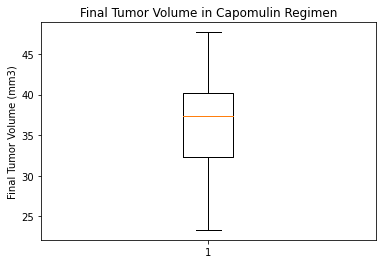

In [32]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(capomulin_list)
plt.show()


In [33]:
ramicane_data_df = max_df[max_df['Drug Regimen'].isin(['Ramicane'])]
ramicane_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,327,a411,Ramicane,Male,3,22,45,38.407618,1
1,430,a444,Ramicane,Female,10,25,45,43.047543,0
2,214,a520,Ramicane,Male,13,21,45,38.810366,1
3,174,a644,Ramicane,Female,7,17,45,32.978522,1
4,154,c758,Ramicane,Male,9,17,45,33.397653,1


In [34]:
ramicane_list = ramicane_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ramicane_list = ramicane_list["Tumor Volume (mm3)"]
ramicane_list

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [35]:
quartiles = ramicane_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of drug regimen Ramicane is: {lowerq}")
print(f"The upper quartile of drug regimen Ramicane is: {upperq}")
print(f"The interquartile rannge of drug regimen Ramicane is: {iqr}")
print(f"The median of drug regimen Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of drug regimen Ramicane is: 30.981175224999998
The upper quartile of drug regimen Ramicane is: 38.508305307499995
The interquartile rannge of drug regimen Ramicane is: 7.527130082499998
The median of drug regimen Ramicane is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


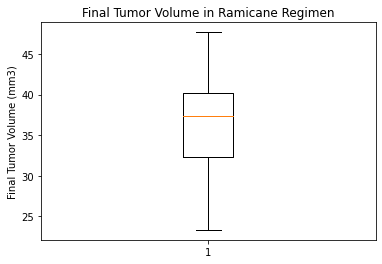

In [31]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(capomulin_list)
plt.show()


In [36]:
infubinol_data_df = max_df[max_df['Drug Regimen'].isin(['Infubinol'])]
infubinol_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,540,a685,Infubinol,Male,8,30,45,66.083066,3
3,637,c139,Infubinol,Male,11,28,45,72.226731,2
4,800,e476,Infubinol,Male,23,26,45,62.435404,1


In [20]:

# Convert column "Tumor Volume" of the Infubinol regimen into a dataframe object
infubinol_list = infubinol_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infubinol_list = infubinol_list["Tumor Volume (mm3)"]
infubinol_list


0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
5    66.196912
6    67.685569
7    67.973419
8    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [21]:
quartiles = infubinol_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of drug regimen Infubinol is: {lowerq}")
print(f"The upper quartile of drug regimen Infubinol is: {upperq}")
print(f"The interquartile range of drug regimen Infubinol is: {iqr}")
print(f"The median of drug regimen Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of drug regimen Infubinol is: 62.75445141
The upper quartile of drug regimen Infubinol is: 67.68556862
The interquartile range of drug regimen Infubinol is: 4.9311172099999965
The median of drug regimen Infubinol is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


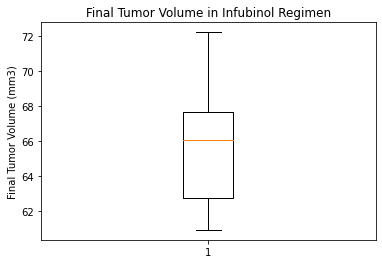

In [73]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(infubinol_list)
plt.show()


In [22]:
ceftamin_data_df = max_df[max_df['Drug Regimen'].isin(['Ceftamin'])]
ceftamin_data_df.head().reset_index()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,493,a275,Ceftamin,Female,20,28,45,62.999356,3
1,993,j296,Ceftamin,Female,24,30,45,61.849023,3
2,1033,k210,Ceftamin,Male,15,28,45,68.923185,3
3,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
4,1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [23]:
ceftamin_list = ceftamin_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceftamin_list = ceftamin_list["Tumor Volume (mm3)"]
ceftamin_list

0     59.741901
1     59.851956
2     61.386660
3     61.433892
4     61.849023
5     62.999356
6     64.299830
7     64.634949
8     64.729837
9     67.527482
10    67.748662
11    68.594745
12    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [24]:
quartiles = ceftamin_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of drug regimen Ceftamin is: {lowerq}")
print(f"The upper quartile of drug regimen Ceftamin is: {upperq}")
print(f"The interquartile range of drug regimen Ceftamin is: {iqr}")
print(f"The median of drug regimen Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of drug regimen Ceftamin is: 61.43389223
The upper quartile of drug regimen Ceftamin is: 67.52748237
The interquartile range of drug regimen Ceftamin is: 6.093590140000003
The median of drug regimen Ceftamin is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


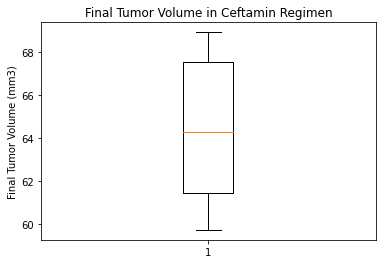

In [110]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ceftamin_list)
plt.show()


In [25]:

plot_data = [capomulin_list, ramicane_list, infubinol_list, ceftamin_list]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(20, 15))
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(plot_data, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)
plt.ylim(10, 90)

plt.show()

NameError: name 'capomulin_list' is not defined

In [79]:
capomulin_df = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [32]:
capomulin_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capomulin_single_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


Text(0, 0.5, 'Tumor Volume (mm3)')

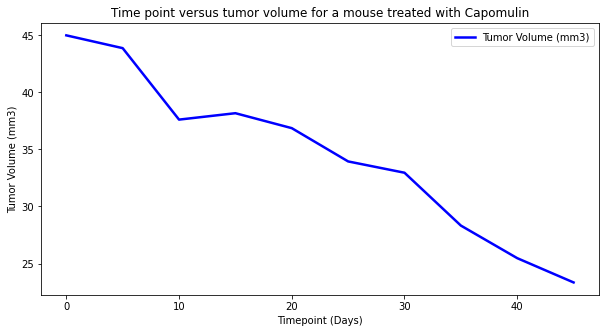

In [116]:
capomulin_single_df = capomulin_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

capomulin_single_df = capomulin_single_df.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='green')
plt.title('Capomulin treatmeant of mouse')

plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


In [119]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df.head()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [130]:
decrease_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
decrease_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [136]:
average_capomulin = pd.DataFrame(decrease_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_capomulin.head()


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


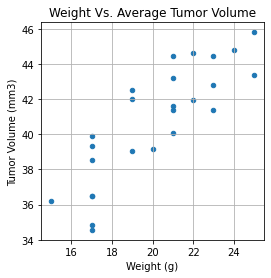

In [137]:

average_capomulin = average_capomulin.set_index('Mouse ID')
average_capomulin.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(10,5),
              title="Weight Vs. Average Tumor Volume")
plt.show()

In [37]:
## Correlation and Regression



In [38]:
#average_cap = average_cap.set_index('Mouse ID')
mouse_weight = average_capomulin.iloc[:,0]
average_tumor_volume = average_capomulin.iloc[:,1]
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation between both factors is  {round(correlation[0],2)}")

The correlation between both factors is  0.84


In [39]:


x_values = average_capomulin['Weight (g)']
y_values = average_capomulin['Tumor Volume (mm3)']


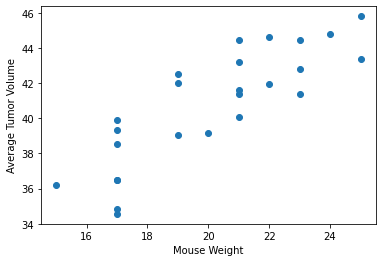

In [48]:
plt.scatter(x_values,y_values)

plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

In [54]:

from scipy import stats


In [55]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)


Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64


In [56]:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq) 


y = 0.95x + 21.55


In [57]:
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.7088568047708717


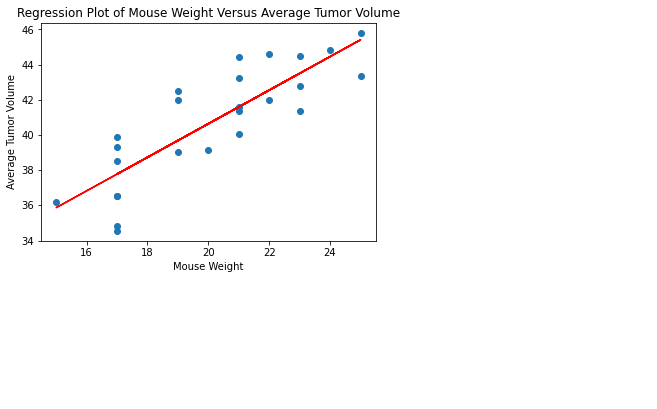

In [138]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()
